In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk(
#    '/kaggle/input'):
 #   for filename in filenames:
   #     print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import cv2
import numpy as np 
import pandas as pd 
import os

In [4]:
from PIL import Image
import os
image_names=os.listdir('/kaggle/input/hazing-images-dataset-cvpr-2019/hazy')
folder_path = '/kaggle/input/hazing-images-dataset-cvpr-2019/hazy'
image_names.sort()
x=[]
for image_file in image_names:
    image_path = os.path.join(folder_path, image_file)
    arr=cv2.imread(image_path)
    #arr=cv2.cvtColor(arr,cv2.COLOR_BGR2RGB)
    #print(arr.shape)
    arr2=cv2.resize(arr,(256,256),interpolation=cv2.INTER_LINEAR)
    
    x.append(arr2)

convert the given image into np array and resize it into 256*256*3 image
repeat the same for y also 

In [5]:
from PIL import Image
import os
image_names=os.listdir('/kaggle/input/hazing-images-dataset-cvpr-2019/GT')
folder_path = '/kaggle/input/hazing-images-dataset-cvpr-2019/GT'
image_names.sort()
y=[]
for image_file in image_names:
    image_path = os.path.join(folder_path, image_file)
    arr=cv2.imread(image_path)
    #arr=cv2.cvtColor(arr,cv2.COLOR_BGR2RGB)
    arr2=cv2.resize(arr,(256,256),interpolation=cv2.INTER_LINEAR)
    y.append(arr2)

normalizing the data

In [6]:
x=np.array(x)/255
y=np.array(y)/255

In [7]:
x[0].shape

(256, 256, 3)

In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.5)

splitting the data into train test sets 
since the dataset is too small i am using the whole dataset and using 50% for validation dataset

In [9]:
xtrain=np.array(xtrain)
ytrain=np.array(ytrain)
xtest=np.array(xtest)
ytest=np.array(ytest)

an example of the hazy image

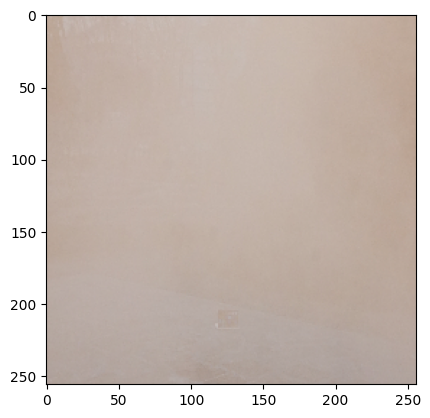

In [10]:
import matplotlib.pyplot as plt
plt.imshow(x[10])

import necessary libraries

In [11]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Input,UpSampling2D, Dropout, BatchNormalization, Conv2DTranspose

from tensorflow.keras.models import Model

2024-03-20 13:53:30.337075: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-20 13:53:30.337167: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-20 13:53:30.456734: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


main model **encoder decoder model**

In [12]:
#encoder start
inputs=Input(shape=(256,256,3))

con1=Conv2D(32,5,activation='relu',padding='same')(inputs)
#con1=BatchNormalization()(con1)
maxp=MaxPooling2D(2,padding='same')(con1)
bn=BatchNormalization()(maxp)
#dp=Dropout(0.1)(bn)

con2=Conv2D(64,5,activation='relu',padding='same')(bn)
#con2=BatchNormalization()(con2)
maxp1=MaxPooling2D(2,padding='same')(con2)
bn=BatchNormalization()(maxp1)
#dp=Dropout(0.1)(bn)

con3=Conv2D(80,5,activation='relu',padding='same')(bn)
#con3=BatchNormalization()(con3)
maxp2=MaxPooling2D(2,padding='same')(con3)
bn=BatchNormalization()(maxp2)
#dp=Dropout(0.1)(bn)

con3=Conv2D(128,5,activation='relu',padding='same')(bn)
#con3=BatchNormalization()(con3)
maxp2=MaxPooling2D(2,padding='same')(con3)
bn=BatchNormalization()(maxp2)
#dp=Dropout(0.1)(bn)

con3=Conv2D(256,5,activation='relu',padding='same')(bn)
#con3=BatchNormalization()(con3)
maxp2=MaxPooling2D(2,padding='same')(con3)
bn=BatchNormalization()(maxp2)
#dp=Dropout(0.1)(bn)


#encoder end
#decoder start

con4=Conv2D(256,5,activation='relu',padding='same')(bn)
con4=BatchNormalization()(con4)
up=UpSampling2D(2)(con4)
#dp=Dropout(0.1)(up)

con4=Conv2D(128,5,activation='relu',padding='same')(up)
con4=BatchNormalization()(con4)
up=UpSampling2D(2)(con4)
#dp=Dropout(0.1)(up)

con4=Conv2D(80,5,activation='relu',padding='same')(up)
con4=BatchNormalization()(con4)
up=UpSampling2D(2)(con4)
#dp=Dropout(0.1)(up)

con5=Conv2D(64,5,activation='relu',padding='same')(up)
con5=BatchNormalization()(con5)
up1=UpSampling2D(2)(con5)
#dp=Dropout(0.1)(up1)

con6=Conv2D(32,5,activation='relu',padding='same')(up1)
con6=BatchNormalization()(con6)
up2=UpSampling2D(2)(con6)
#dp=Dropout(0.1)(up2)

out=Conv2D(3,4,activation='sigmoid',padding='same')(up2)
#ecoder end
model=Model(inputs=inputs,outputs=out)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 80)     │       128,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 80)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 80)     │           320 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       256,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 128)    │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,156,739 (15.86 MB)

 Trainable params: 4,154,499 (15.85 MB)

 Non-trainable params: 2,240 (8.75 KB)

compile the model

In [21]:
model.compile(optimizer='adam',loss='mean_squared_error')

fitting it to the whole dataset since it is too small and running **1000** epochs

In [22]:
histr=model.fit(x,y,epochs=1000,validation_data=[xtest,ytest],batch_size=5)#,callbacks=[early_stopping])

Epoch 1/1000
 5/11 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1161

I0000 00:00:1710942993.059559     127 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 418ms/step - loss: 0.1008 - val_loss: 0.3552
Epoch 2/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0618 - val_loss: 0.2698
Epoch 3/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0616 - val_loss: 0.2461
Epoch 4/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0561 - val_loss: 0.1696
Epoch 5/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0515 - val_loss: 0.1045
Epoch 6/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0497 - val_loss: 0.1414
Epoch 7/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0522 - val_loss: 0.0531
Epoch 8/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0486 - val_loss: 0.0534
Epoch 9/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0469 - val_loss: 0.0702
Epoch 10/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0478 - val_loss: 0.0495
Epoch 11/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0476 - val_loss: 0.0508
Epoch 12/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/ste

finally we can observe that the loss is ~0.0054 and since the validation data doesn't contain any new images we cannot see any difference between validation loss and training loss
and runinig it for any more epochs doesn't improve the performance at all
if we had more data probably our model would've performed better
and also adding dropout anywhere i.e before or after batch normalization is impacting the performance of model adversely

In [ ]:
#model.fit(x,y,epochs=300,validation_data=[xtest,ytest],batch_size=5)#,callbacks=[early_stopping])

save the model as required

In [23]:
model.save('model_without_dropout.keras')

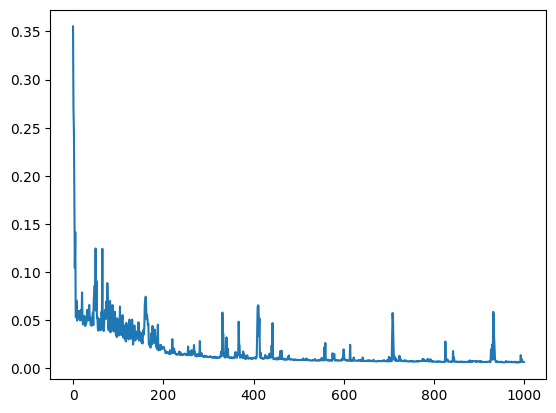

In [24]:
import matplotlib.pyplot as plt
plt.plot(histr.history['val_loss'])


let's try it on an example from the dataset

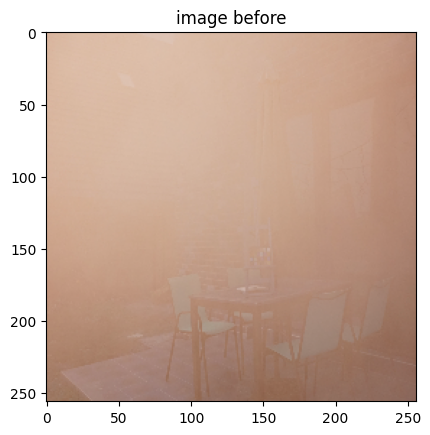

In [25]:
arr=cv2.imread('/kaggle/input/hazing-images-dataset-cvpr-2019/hazy/05_hazy.png')
#arr=cv2.cvtColor(arr,cv2.COLOR_BGR2RGB)
arr2=cv2.resize(arr,(256,256),interpolation=cv2.INTER_LINEAR)
arr2=np.array([arr2])/255
plt.title('image before')
plt.imshow(arr2[0])

i know the result is not that good but the amount of data present is alo too less

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


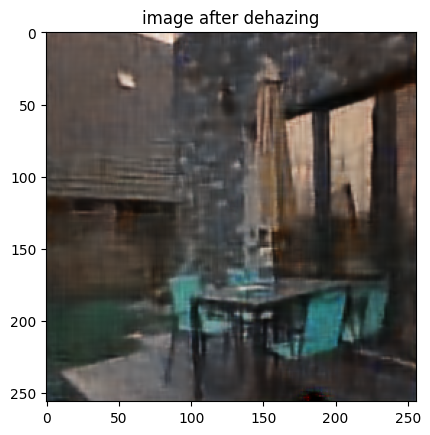

In [26]:
arr=cv2.imread('/kaggle/input/hazing-images-dataset-cvpr-2019/hazy/05_hazy.png')
#arr=cv2.cvtColor(arr,cv2.COLOR_BGR2RGB)
arr2=cv2.resize(arr,(256,256),interpolation=cv2.INTER_LINEAR)
arr2=np.array([arr2])/255
#arr2=arr2/255
prerd=model.predict(arr2)
import matplotlib.pyplot as plt
prerd=prerd
plt.title('image after dehazing')
plt.imshow(prerd[0])

Actual image